In [2]:
import importlib
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [3]:
from multi_loc import covariance, assimilate

In [4]:
%matplotlib inline

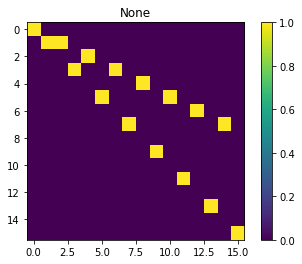

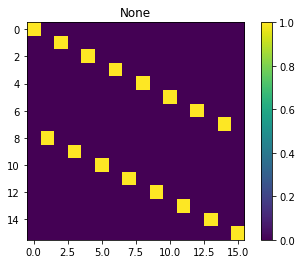

In [49]:
perm = np.eye(m)
half = round(m/2)
I = np.eye(m)
perm[:, ::2] = I[:, :half]
imshow(perm)
perm[:, 1::2] = I[:, half:]
imshow(perm)

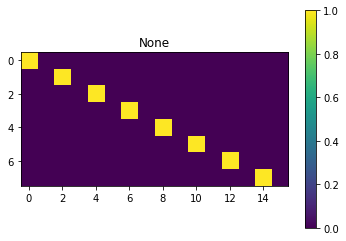

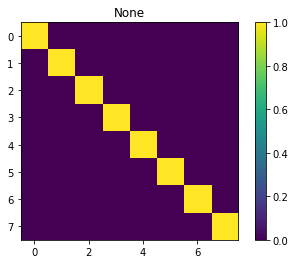

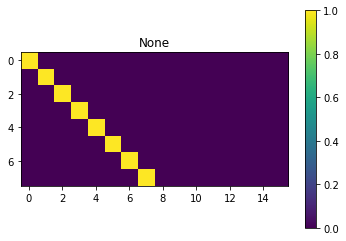

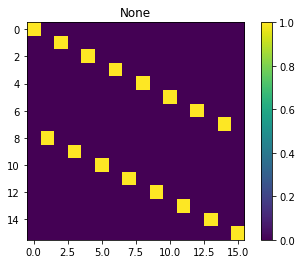

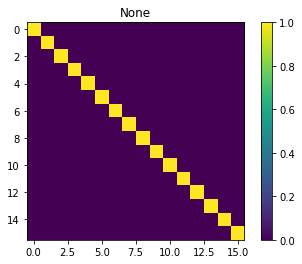

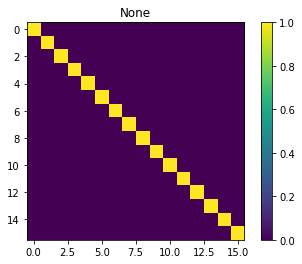

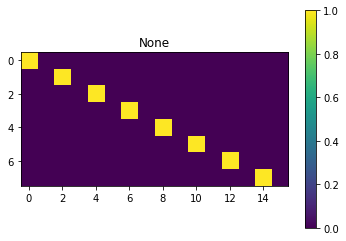

In [63]:
m = dimension
n = round(m/2)
H = np.eye(m)
H = H[::2]
imshow(H)

U = np.eye(n)
imshow(U)
S = np.eye(m)[:n]
imshow(S)
H_t = np.eye(m)
H_t = H_t[1::2]
VT = np.concatenate([H, H_t], axis=0)
imshow(VT)
imshow(VT @ VT.T)
imshow(VT.T @ VT)

H_reconstruct = U @ S @ VT
imshow(H_reconstruct)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


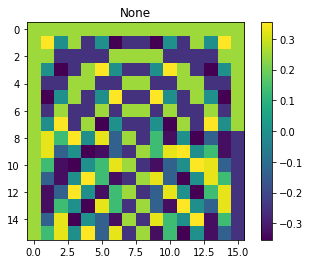

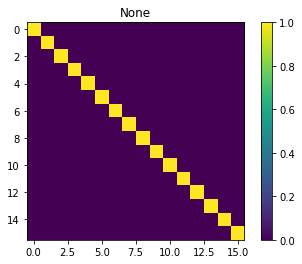

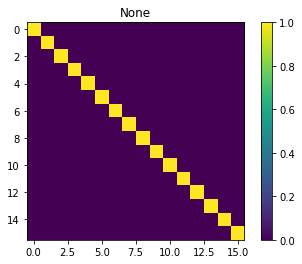

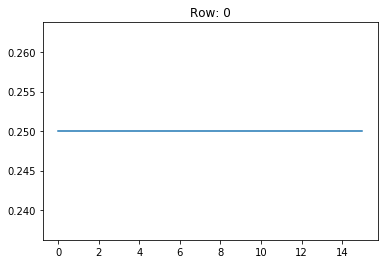

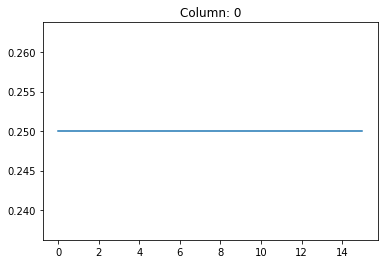

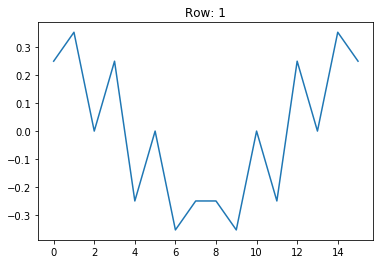

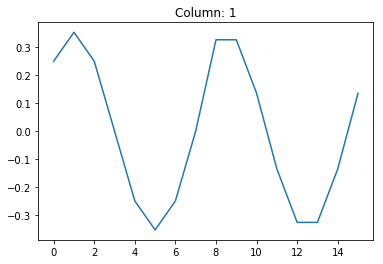

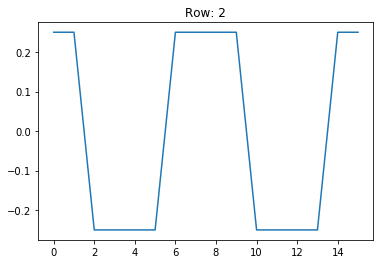

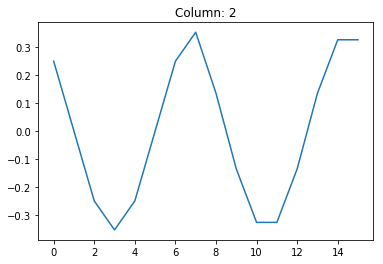

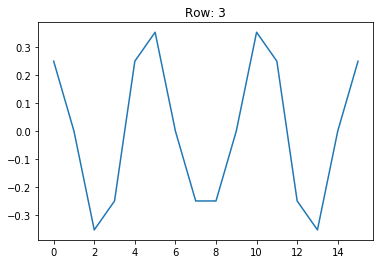

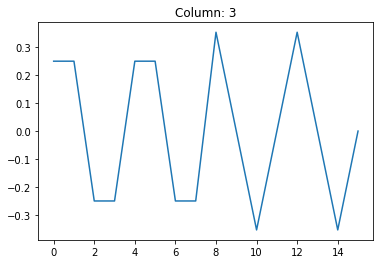

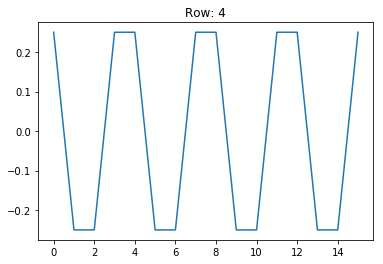

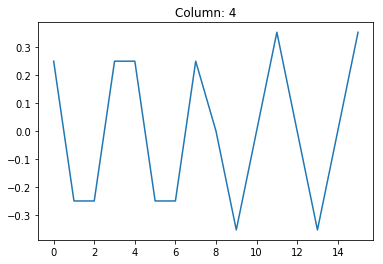

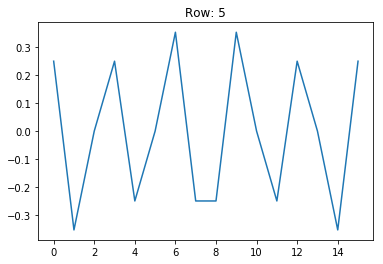

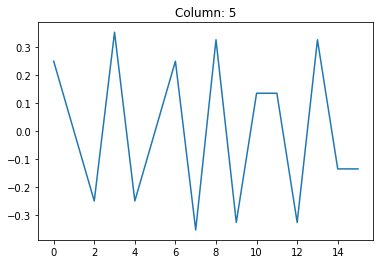

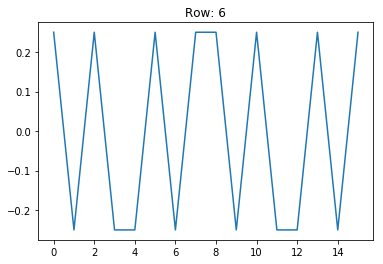

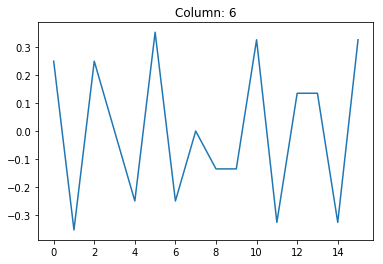

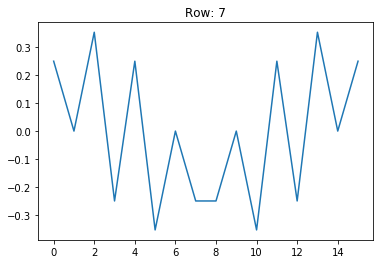

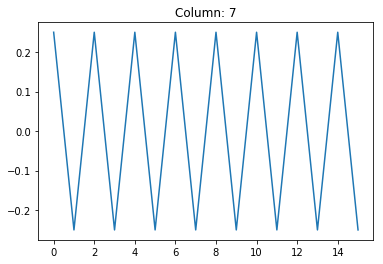

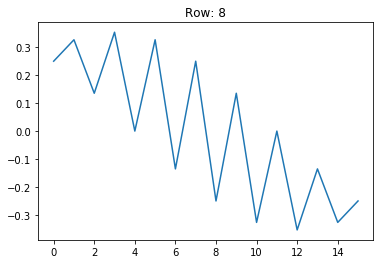

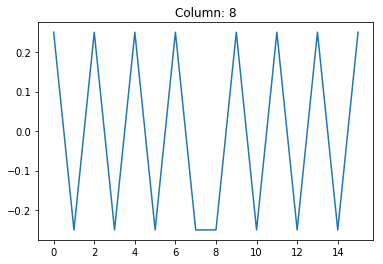

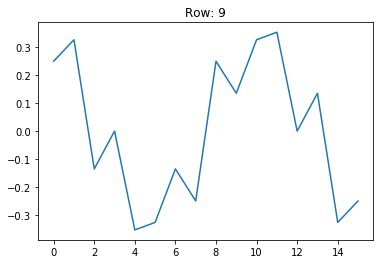

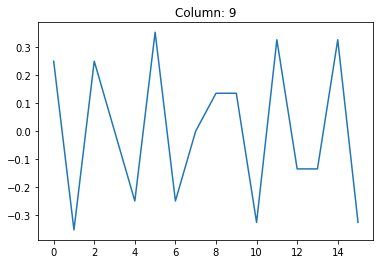

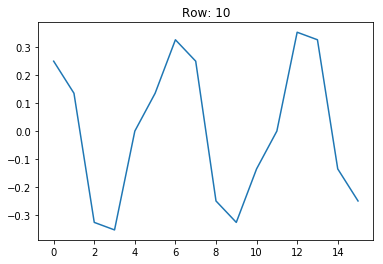

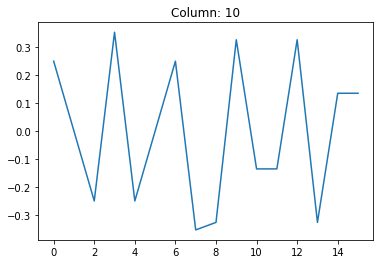

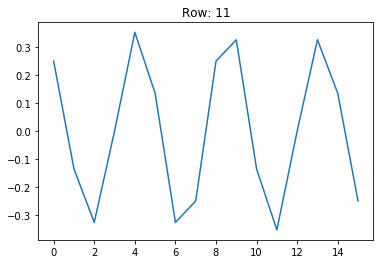

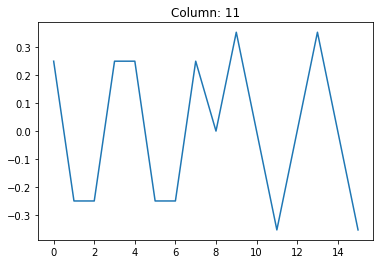

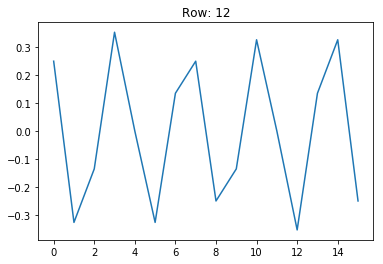

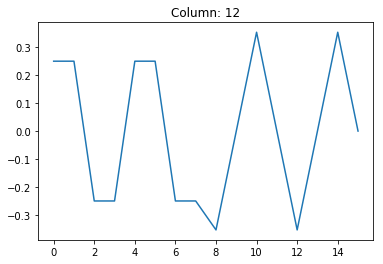

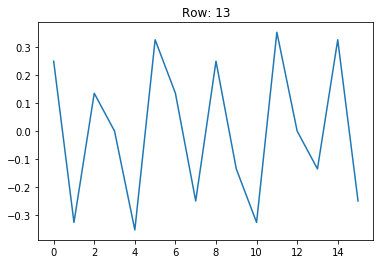

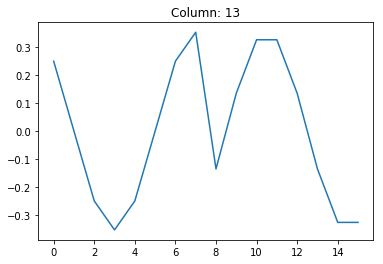

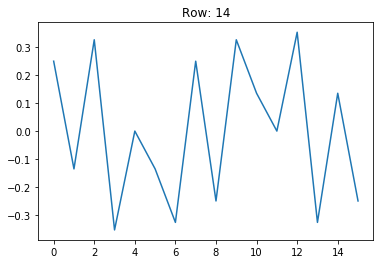

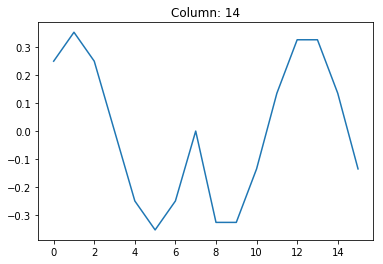

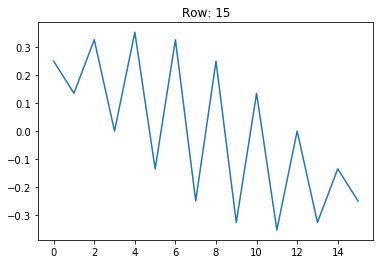

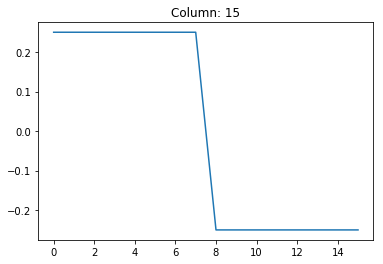

In [65]:
# this = S @ VT @ eig_vec
this = VT @ eig_vec

imshow(this)
imshow(this.T @ this)
imshow(this @ this.T)
for ii in range(this.shape[0]):
    plt.figure()
    plt.plot(this[ii])
    plt.title(f'Row: {ii}')
    
    plt.figure()
    plt.plot(this[:, ii])
    plt.title(f'Column: {ii}')

In [67]:
S.T.shape

(16, 8)

In [69]:
VT.shape

(16, 16)

In [70]:
eig_vec.shape

(16, 16)

In [71]:
S.shape

(8, 16)

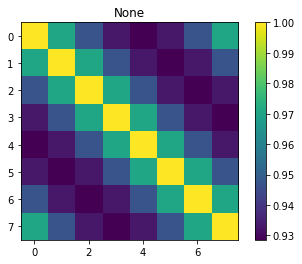

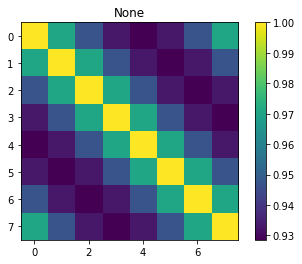

In [74]:
HPH = H @ P @ H.T
this = S @ VT @ eig_vec @ np.diag(eig_val) @ (S @ VT @ eig_vec).T
imshow(this)
imshow(HPH)

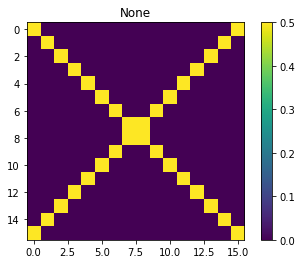

In [56]:
imshow((S @ VT @ eig_vec).conj().T @ (S @ VT @ eig_vec))

In [22]:
H_t = np.eye(dimension)[1::2]

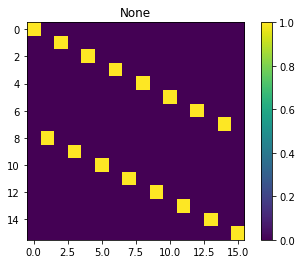

In [26]:
VT_t = np.concatenate([H, H_t], axis=0)
imshow(VT_t)

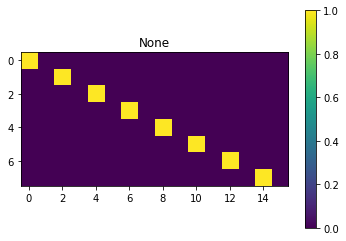

In [31]:
this = np.eye(H.shape[0]) @ H @ np.eye(H.shape[1])
imshow(this)

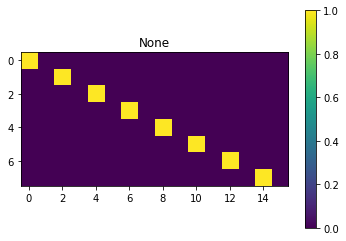

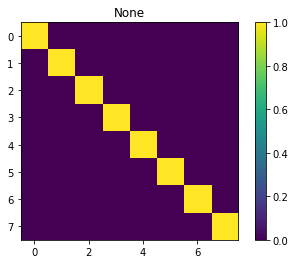

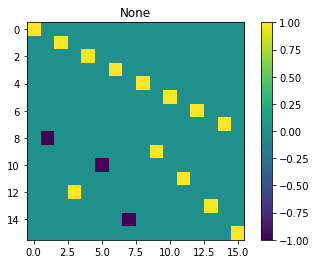

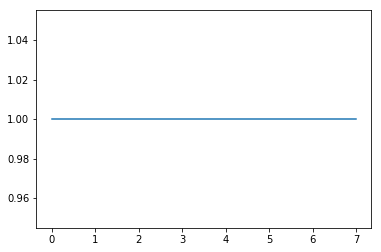

In [21]:
U, s, VT = sp.linalg.svd(H)
imshow(H)
imshow(U)
imshow(VT)
plt.figure()
plt.plot(s)

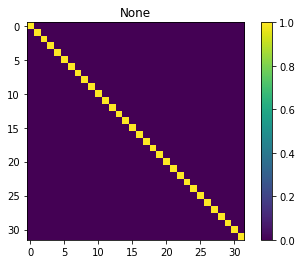

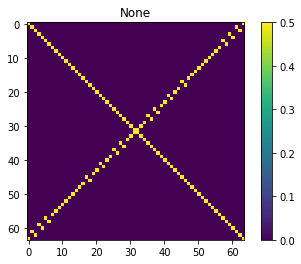

In [13]:
imshow((H @ eig_vec) @ (H @ eig_vec).conj().T)
imshow((H @ eig_vec).conj().T @ (H @ eig_vec))

In [5]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [17]:
N = 16
dx = 0.5
k = covariance.return_waves(N)
k = k/(N * dx)
k = np.fft.fftshift(k)
# new_k = 2*(np.arange(N))/N - 1
new_k = ((np.arange(N) - N/2)/(N * dx))
print(k)
print(new_k)

[-1.    -0.875 -0.75  -0.625 -0.5   -0.375 -0.25  -0.125  0.     0.125
  0.25   0.375  0.5    0.625  0.75   0.875]
[-1.    -0.875 -0.75  -0.625 -0.5   -0.375 -0.25  -0.125  0.     0.125
  0.25   0.375  0.5    0.625  0.75   0.875]


In [61]:
dimension = 2**4
rho0 = 20
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [62]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_exp_1d,
    return_Corr = True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

Text(0.5,0.98,'Eigenvalues P')

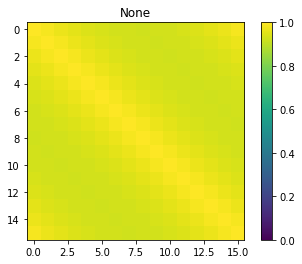

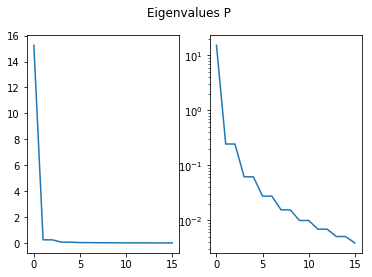

In [20]:
imshow(P, vmin=0)
fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

In [9]:
%matplotlib inline

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


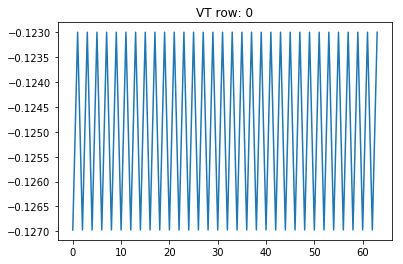

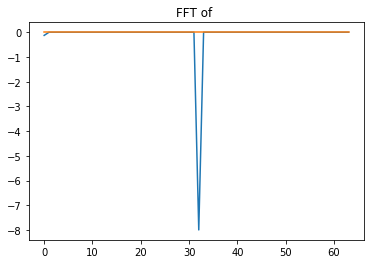

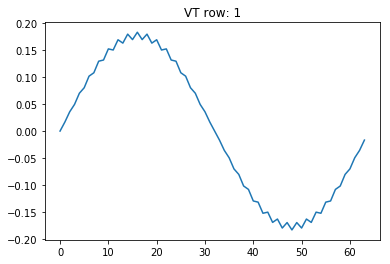

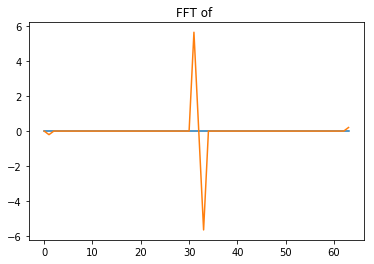

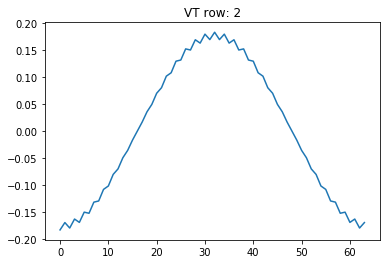

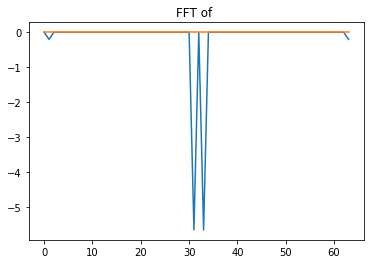

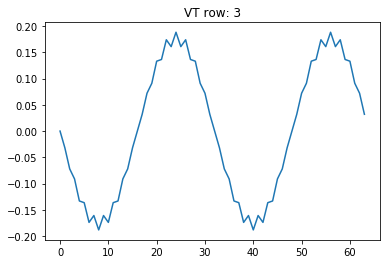

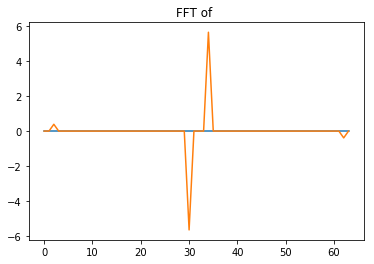

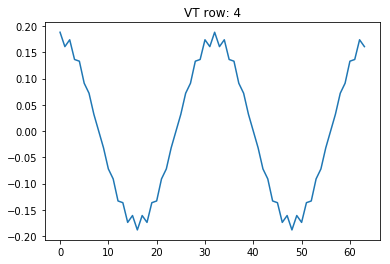

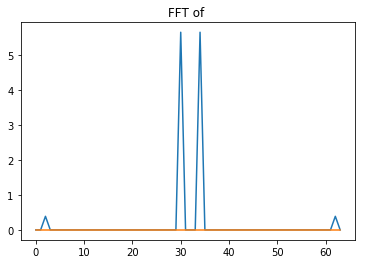

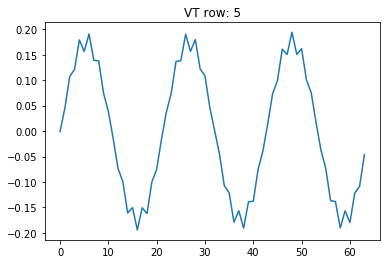

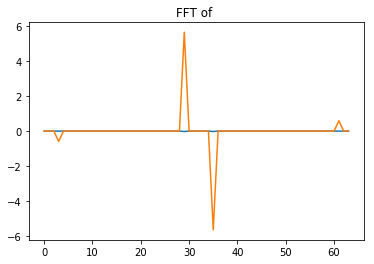

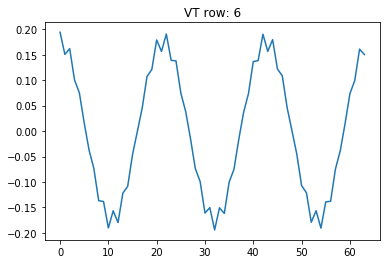

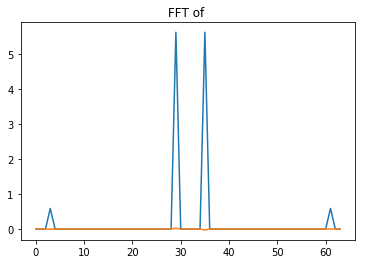

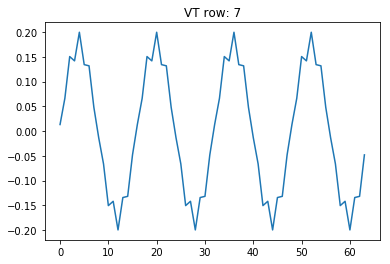

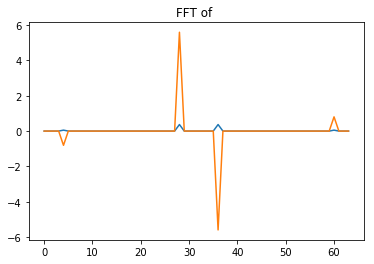

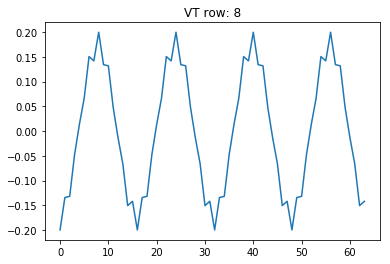

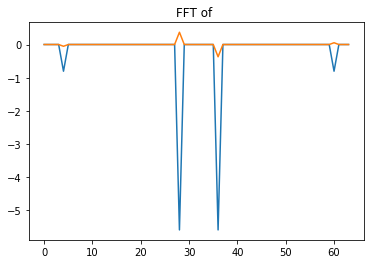

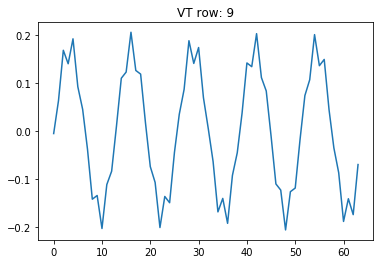

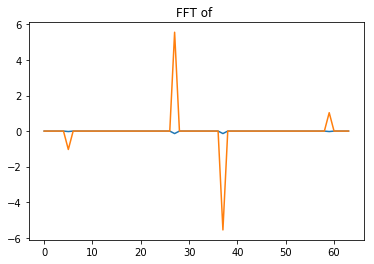

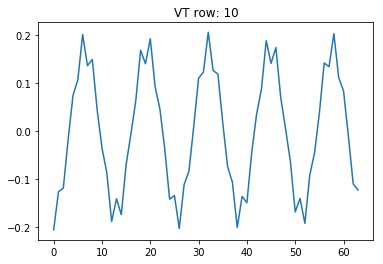

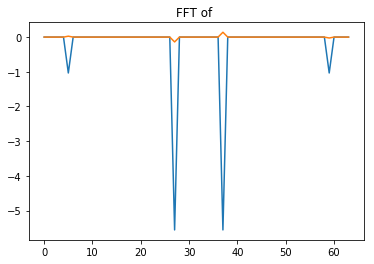

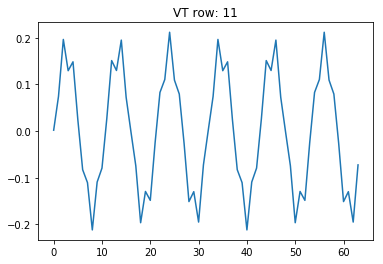

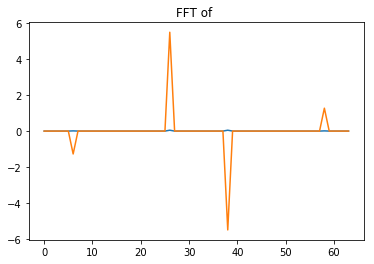

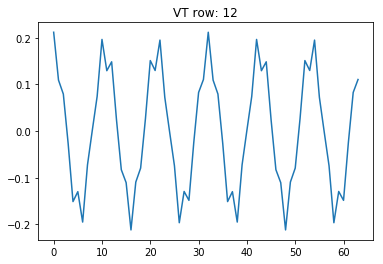

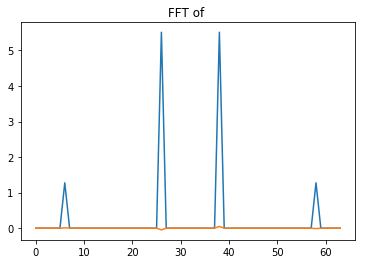

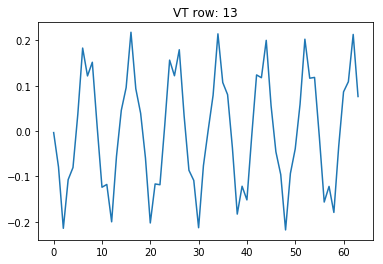

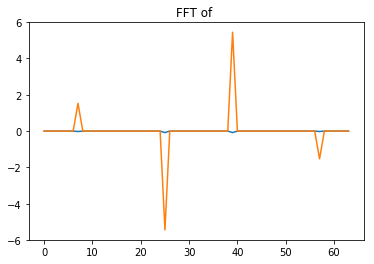

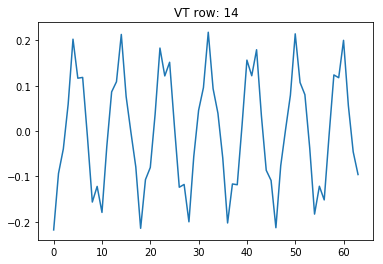

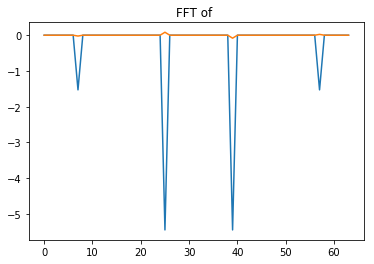

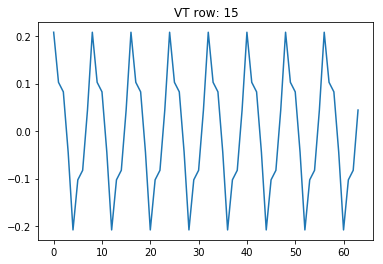

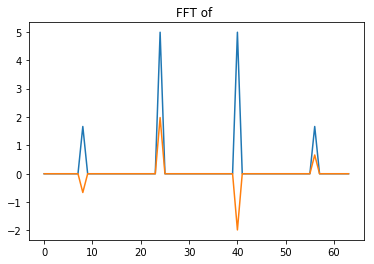

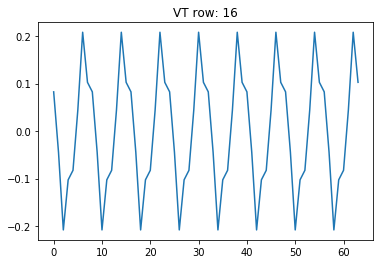

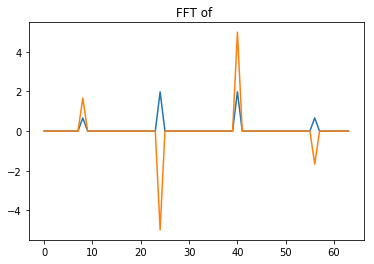

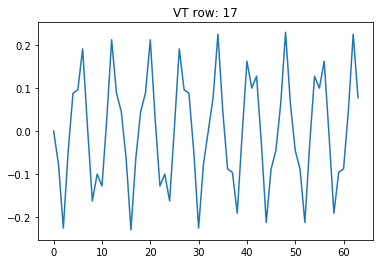

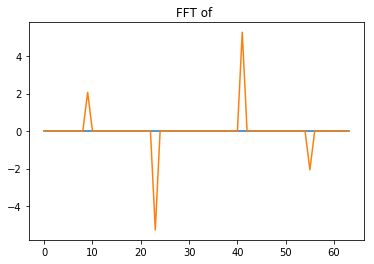

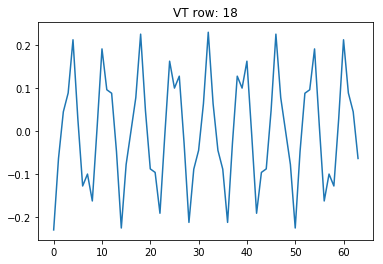

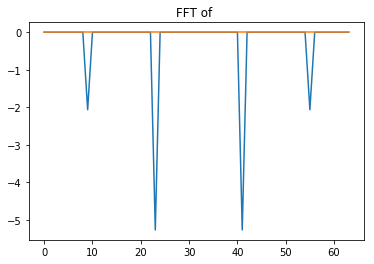

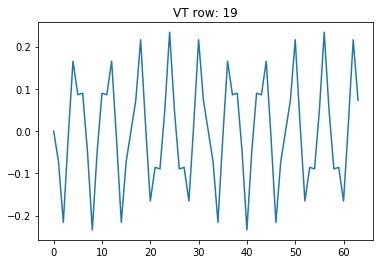

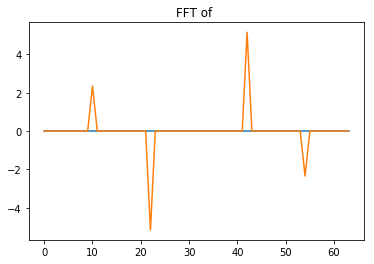

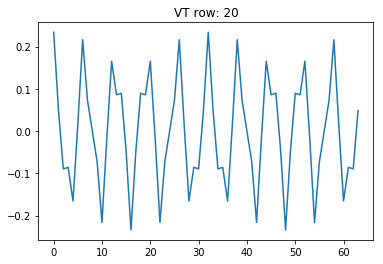

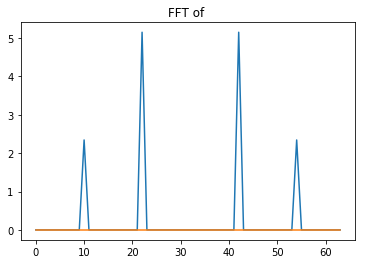

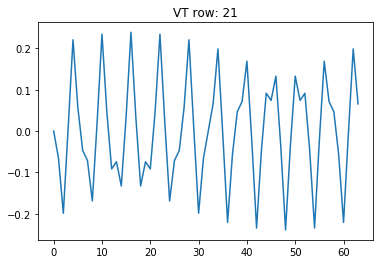

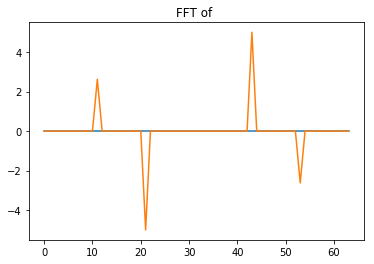

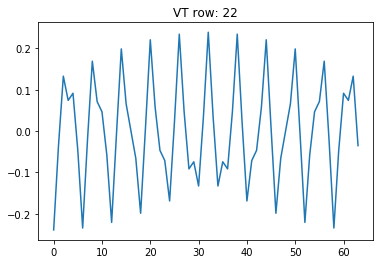

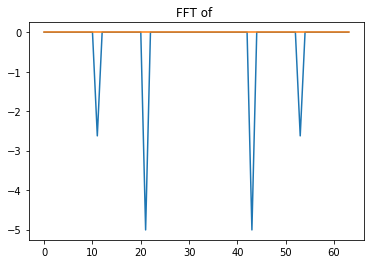

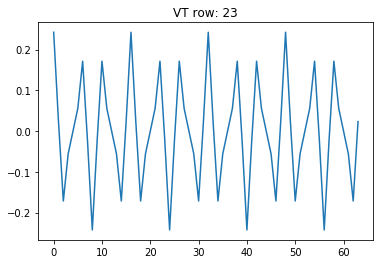

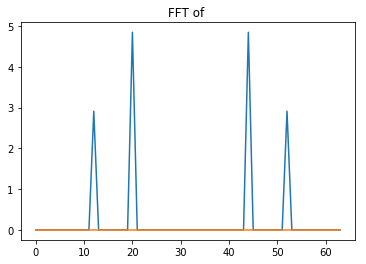

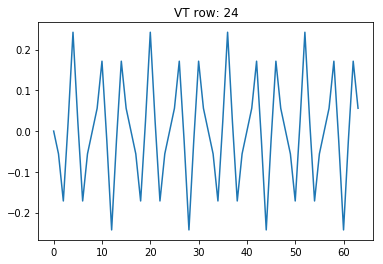

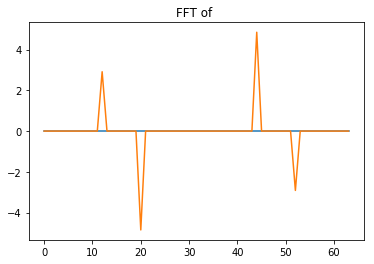

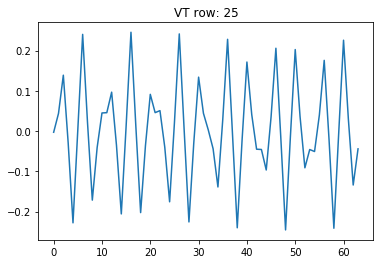

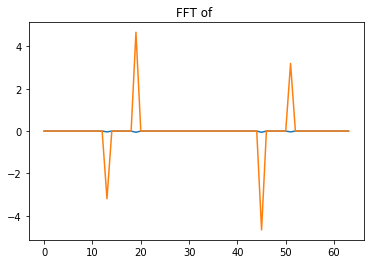

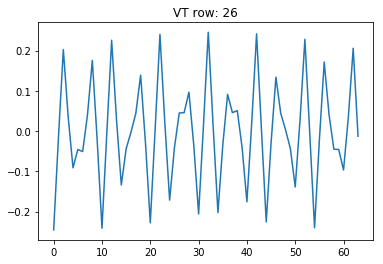

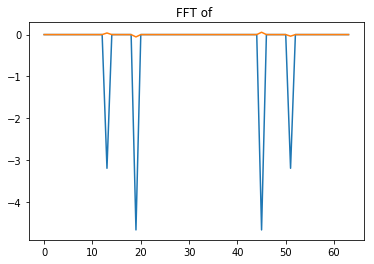

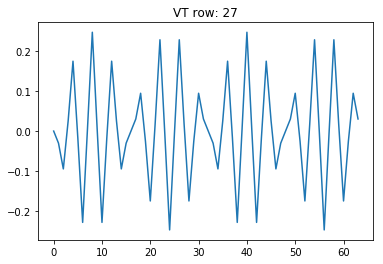

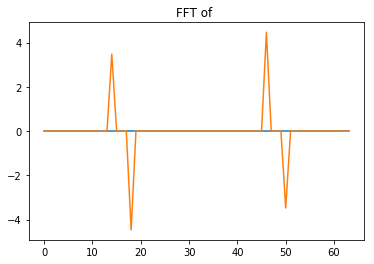

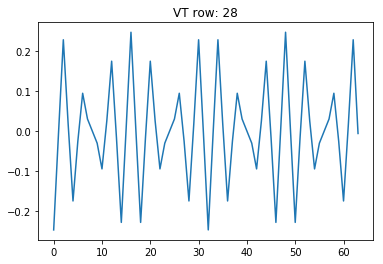

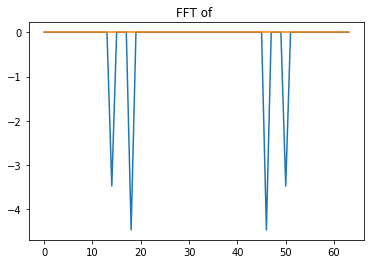

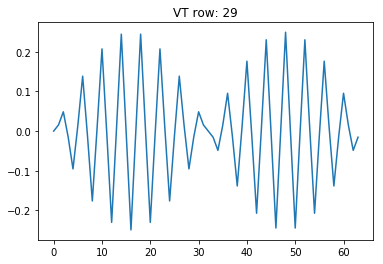

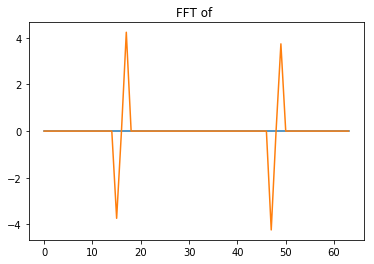

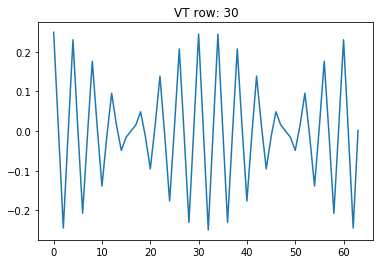

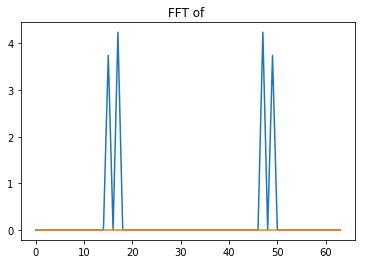

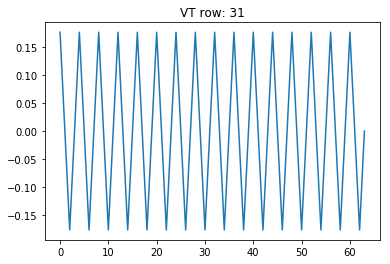

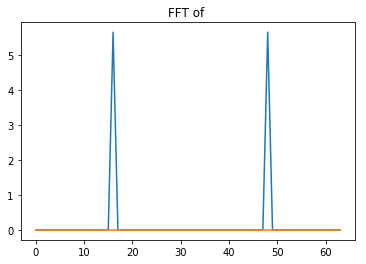

In [10]:
# imshow(U, 'U')

# for ii in range(U.shape[1]):   
#     plt.figure()
#     plt.plot(U[:, ii])
#     plt.title(f'column: {ii}')
    
#     u_fft = np.fft.fft(U[:, ii])
#     plt.figure()
#     plt.plot(u_fft.real)
#     plt.plot(u_fft.imag)
#     plt.title(f'VT row: {ii}')
    
# imshow(VT, 'VT')

for ii in range(round(VT.shape[0]/2)):
    x = np.arange(dimension)/dimension*2*np.pi
    truth = np.cos(x*ii)
    
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}')
    
    v_fft = np.fft.fft(VT[ii])
    v_fft = np.fft.fftshift(v_fft)
    plt.figure()
    plt.plot(v_fft.real)
    plt.plot(v_fft.imag)
    plt.title(f'FFT of ')

In [187]:
%matplotlib inline

In [188]:
dimension = 100
rho0 = 10
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [190]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_sqd_exp_1d,
    return_Corr = True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

Text(0.5,0.98,'Eigenvalues P')

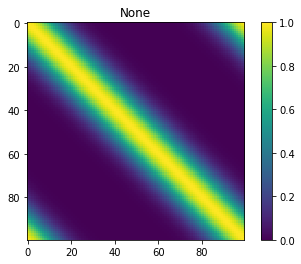

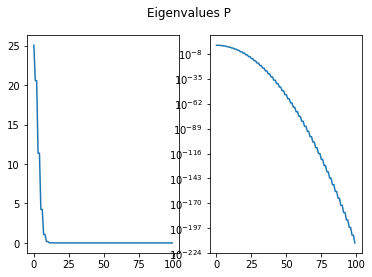

In [192]:
imshow(P, vmin=0)

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

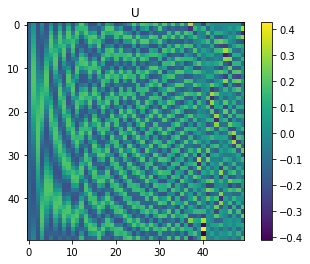

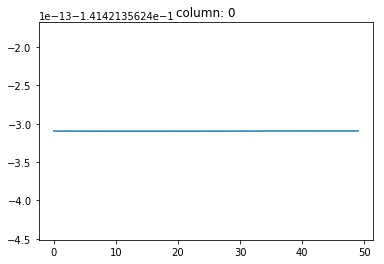

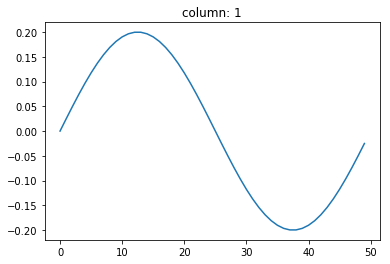

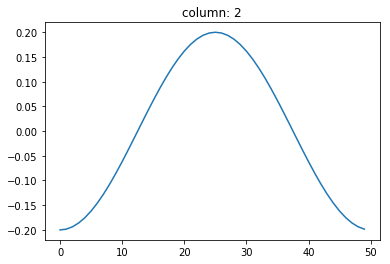

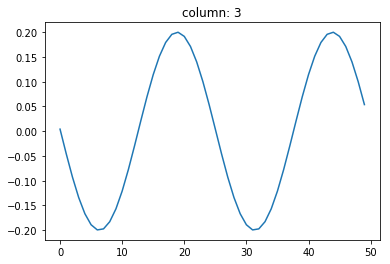

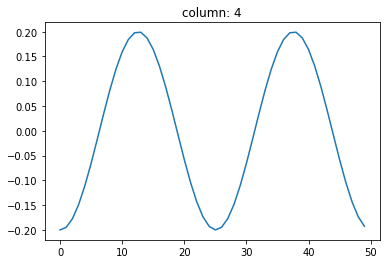

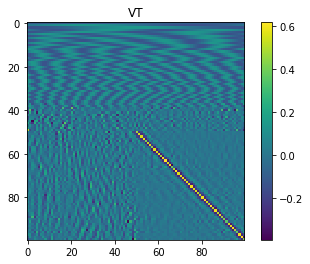

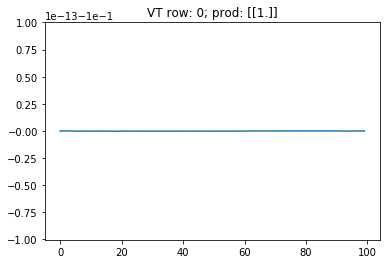

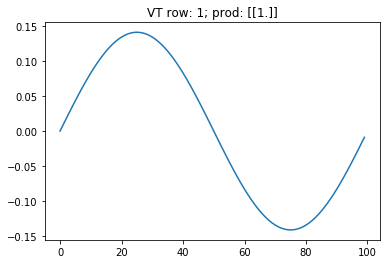

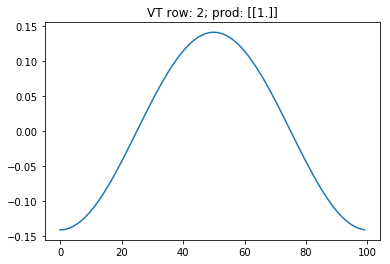

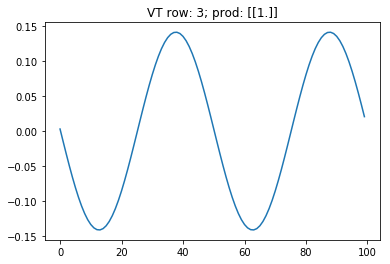

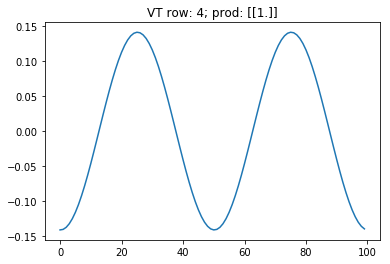

In [193]:
imshow(U, 'U')

for ii in range(5):   
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'column: {ii}')
    
imshow(VT, 'VT')

for ii in range(5):
    x = np.arange(dimension)/dimension*2*np.pi
    truth = np.cos(x*ii)
    prod = VT[ii][None, :] @ VT[ii][None, :].conj().T
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}; prod: {prod}')

/anaconda3/envs/loc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


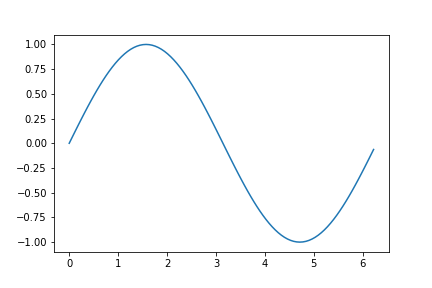

<IPython.core.display.Javascript object>


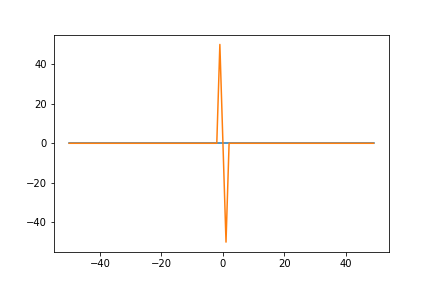

In [48]:
N = 100
x = np.arange(100)*2*np.pi/N
sin = np.sin(x)
fft = np.fft.fft(sin)
fft = np.fft.fftshift(fft)
k = np.arange(-N/2, N/2)

plt.figure()
plt.plot(x, sin)

plt.figure()
plt.plot(k, fft.real)
plt.plot(k, fft.imag)